# Wahrscheinlichkeitskarten
APOC basiert auf [pyclesperanto](https://github.com/clEsperanto/pyclesperanto_prototype) und [sklearn](https://scikit-learn.org/stable/).

Beginnen wir mit dem Laden eines Beispielbildes und einiger Grundwahrheiten:

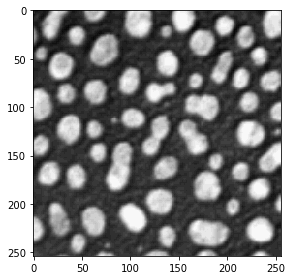

In [1]:
from skimage.io import imread, imshow, imsave
import matplotlib.pyplot as plt
import numpy as np
import apoc

image = imread('blobs.tif')
imshow(image)

In [2]:
do_manual_annotation = False

if do_manual_annotation: # you can use this to make manual annotations
    import napari

    # start napari
    viewer = napari.Viewer()
    napari.run()

    # add image
    viewer.add_image(image)

    # add an empty labels layer and keep it in a variable
    labels = np.zeros(image.shape).astype(int)
    viewer.add_labels(labels)
    
else:
    labels = imread('annotations_3class.tif')

C:\Users\rober\miniconda3\envs\bio_38\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


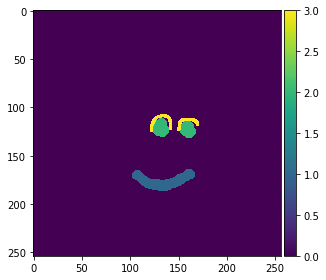

In [3]:
manual_annotations = labels
if do_manual_annotation:
    imsave('annotations_3class.tif', manual_annotations)

from skimage.io import imshow
imshow(manual_annotations, vmin=0, vmax=3)

## Training
Wir trainieren jetzt einen PixelClassifier, der im Hintergrund ein [scikit-learn RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) ist. Nach dem Training wird der Klassifizierer in [clij-kompatiblen OpenCL-Code](https://github.com/clEsperanto/clij-opencl-kernels) umgewandelt und unter einem angegebenen Dateinamen auf der Festplatte gespeichert.

In [4]:
# define features: original image, a blurred version and an edge image
features = "original gaussian_blur=2 sobel_of_gaussian_blur=2"

# this is where the model will be saved
cl_filename = 'my_model.cl'

output_probability_of_class = 3

apoc.erase_classifier(cl_filename)
clf = apoc.ProbabilityMapper(opencl_filename=cl_filename, output_probability_of_class=output_probability_of_class)
clf.train(features, manual_annotations, image)

## Vorhersage
Der Klassifizierer kann dann verwendet werden, um alle Pixel im gegebenen Bild zu klassifizieren. Ausgangspunkt ist wieder der Feature-Stack. Daher muss der Benutzer sicherstellen, dass für das Training und die Vorhersage die gleichen Features verwendet werden.

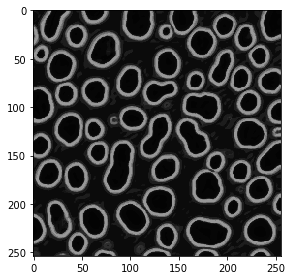

In [5]:
result = clf.predict(image=image)
imshow(result)

## Training / Vorhersage für andere Klassen
Wir werden jetzt erneut trainieren und die Wahrscheinlichkeit einer anderen Klasse ausgeben

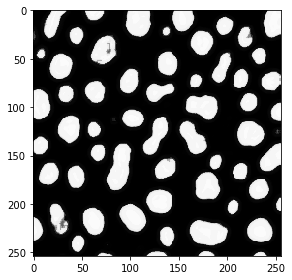

In [6]:
output_probability_of_class = 2

apoc.erase_classifier(cl_filename)
clf = apoc.ProbabilityMapper(opencl_filename=cl_filename, output_probability_of_class=output_probability_of_class)
clf.train(features, manual_annotations, image)

result = clf.predict(image=image)
imshow(result)

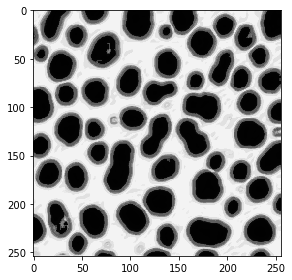

In [7]:
output_probability_of_class = 1

apoc.erase_classifier(cl_filename)
clf = apoc.ProbabilityMapper(opencl_filename=cl_filename, output_probability_of_class=output_probability_of_class)
clf.train(features, manual_annotations, image)

result = clf.predict(image=image)
imshow(result)